In [1]:
import rasterio
import pandas as pd
import numpy as np
from multiprocessing import Pool
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pyproj import Proj, transform

In [2]:
out = {}

for year in [2020, 2019, 2018, 2017, 2016, 2015]:
    src = rasterio.open(f'../tiffs/{year}_v2.tiff')
    out[f'{year}'] = src.read(1)

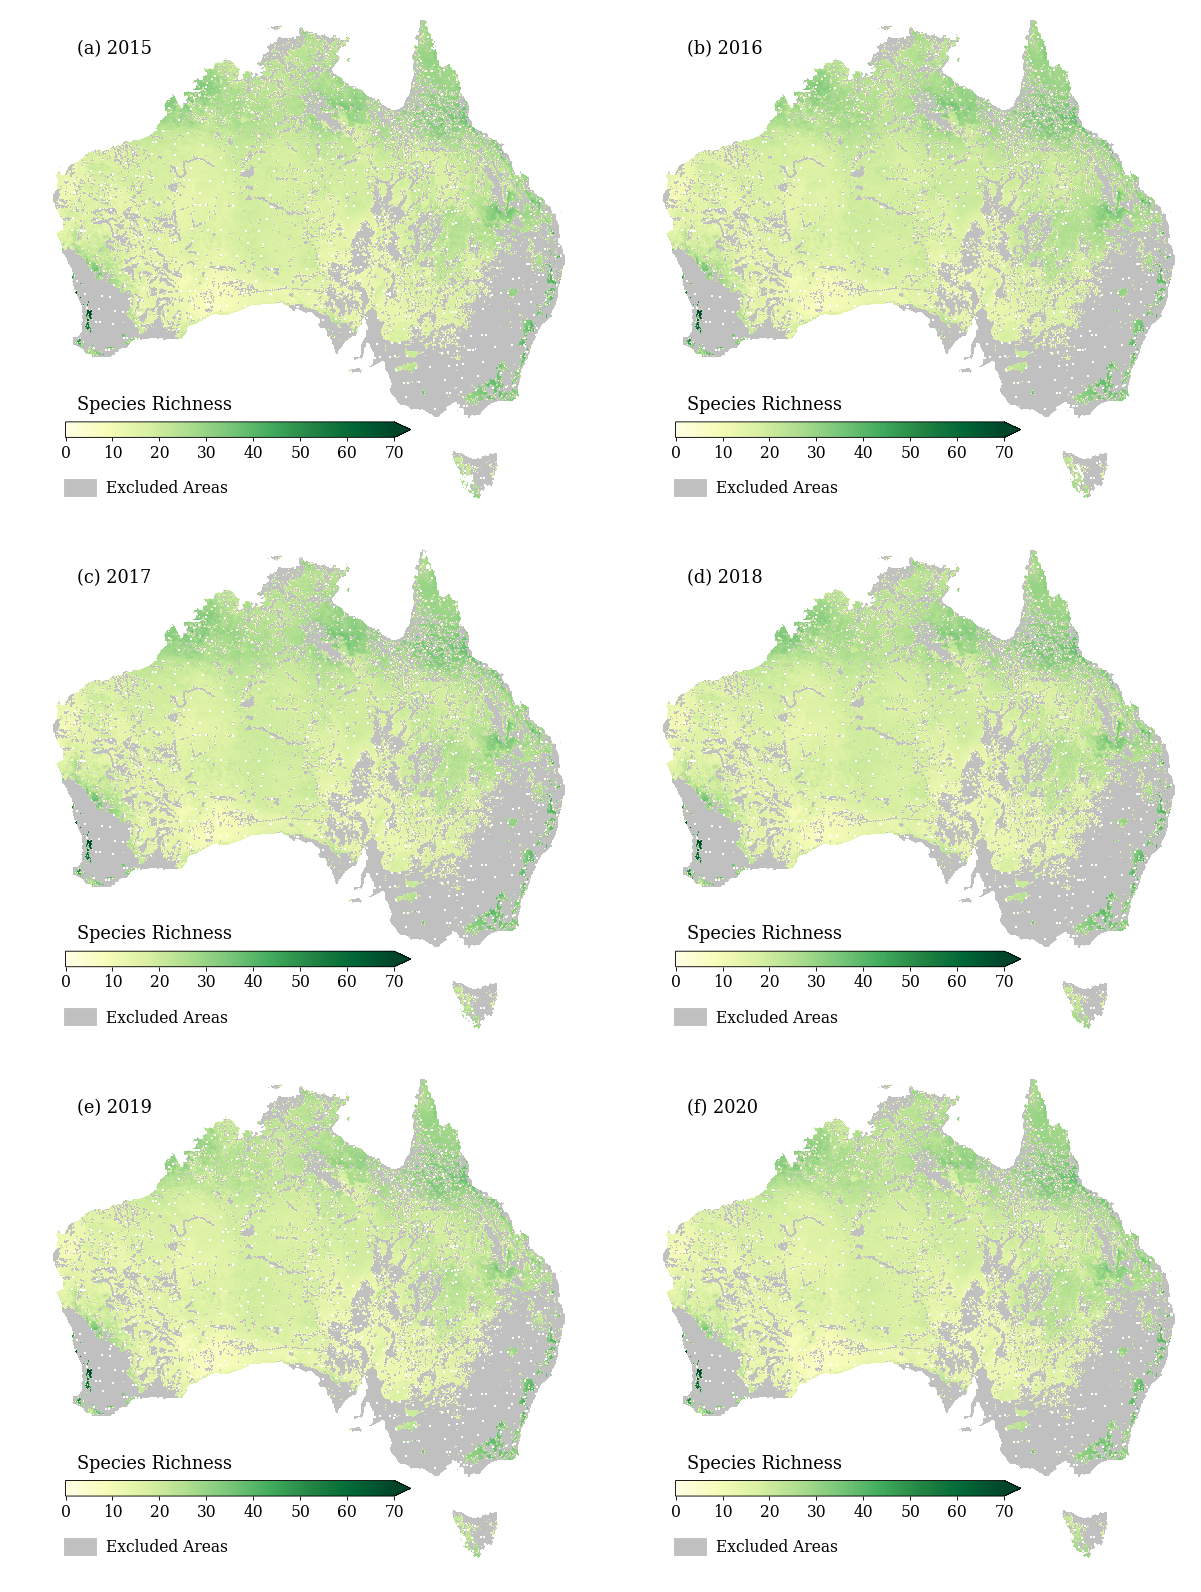

In [3]:
plt.rcParams["font.family"] = "DejaVu Serif"

cmap = plt.get_cmap('YlGn')
cmap.set_under(color='silver', alpha=None)

figure(figsize=(16, 20), dpi=80)

ax = plt.subplot(3, 2, 1)
plt.imshow(out['2015'], cmap=cmap)
plt.box(False)
plt.axis('off')
cb = plt.colorbar(cax=ax.inset_axes((0.1, 0.17, 0.60, 0.03)), orientation='horizontal', extend='max')
plt.clim(0, 70)
t = plt.text(240, 160, '(a) 2015', fontsize=16)
# t.set_bbox(dict(facecolor='grey', alpha=0.1, edgecolor='white'))
t = plt.text(208, 1680, '       ', fontsize=10)
t.set_bbox(dict(facecolor='silver', alpha=1, edgecolor='white'))
t = plt.text(340, 1690, 'Excluded Areas', fontsize=14)
plt.text(240, 1400, 'Species Richness', fontsize=16)
cb.ax.tick_params(labelsize=14)

ax = plt.subplot(3, 2, 2)
plt.imshow(out['2016'], cmap=cmap)
plt.box(False)
plt.axis('off')
cb = plt.colorbar(cax=ax.inset_axes((0.1, 0.17, 0.60, 0.03)), orientation='horizontal', extend='max')
plt.clim(0, 70)
t = plt.text(240, 160, '(b) 2016', fontsize=16)
# t.set_bbox(dict(facecolor='grey', alpha=0.1, edgecolor='white'))
t = plt.text(208, 1680, '       ', fontsize=10)
t.set_bbox(dict(facecolor='silver', alpha=1, edgecolor='white'))
t = plt.text(340, 1690, 'Excluded Areas', fontsize=14)
plt.text(240, 1400, 'Species Richness', fontsize=16)
cb.ax.tick_params(labelsize=14)

ax = plt.subplot(3, 2, 3)
plt.imshow(out['2017'], cmap=cmap)
plt.box(False)
plt.axis('off')
cb = plt.colorbar(cax=ax.inset_axes((0.1, 0.17, 0.60, 0.03)), orientation='horizontal', extend='max')
plt.clim(0,  70)
t = plt.text(240, 160, '(c) 2017', fontsize=16)
# t.set_bbox(dict(facecolor='grey', alpha=0.1, edgecolor='white'))
t = plt.text(208, 1680, '       ', fontsize=10)
t.set_bbox(dict(facecolor='silver', alpha=1, edgecolor='white'))
t = plt.text(340, 1690, 'Excluded Areas', fontsize=14)
plt.text(240, 1400, 'Species Richness', fontsize=16)
cb.ax.tick_params(labelsize=14)

ax = plt.subplot(3, 2, 4)
plt.imshow(out['2018'], cmap=cmap)
plt.box(False)
plt.axis('off')
cb = plt.colorbar(cax=ax.inset_axes((0.1, 0.17, 0.60, 0.03)), orientation='horizontal', extend='max')
plt.clim(0, 70)
t = plt.text(240, 160, '(d) 2018', fontsize=16)
# t.set_bbox(dict(facecolor='grey', alpha=0.1, edgecolor='white'))
t = plt.text(208, 1680, '       ', fontsize=10)
t.set_bbox(dict(facecolor='silver', alpha=1, edgecolor='white'))
t = plt.text(340, 1690, 'Excluded Areas', fontsize=14)
plt.text(240, 1400, 'Species Richness', fontsize=16)
cb.ax.tick_params(labelsize=14)

ax = plt.subplot(3, 2, 5)
plt.imshow(out['2019'], cmap=cmap)
plt.box(False)
plt.axis('off')
cb = plt.colorbar(cax=ax.inset_axes((0.1, 0.17, 0.60, 0.03)), orientation='horizontal', extend='max')
plt.clim(0, 70)
t = plt.text(240, 160, '(e) 2019', fontsize=16)
# t.set_bbox(dict(facecolor='grey', alpha=0.1, edgecolor='white'))
t = plt.text(208, 1680, '       ', fontsize=10)
t.set_bbox(dict(facecolor='silver', alpha=1, edgecolor='white'))
t = plt.text(340, 1690, 'Excluded Areas', fontsize=14)
plt.text(240, 1400, 'Species Richness', fontsize=16)
cb.ax.tick_params(labelsize=14)

ax = plt.subplot(3, 2, 6)
plt.imshow(out['2020'], cmap=cmap)
plt.box(False)
plt.axis('off')
cb = plt.colorbar(cax=ax.inset_axes((0.1, 0.17, 0.60, 0.03)), orientation='horizontal', extend='max')
plt.clim(0,  70)
t = plt.text(240, 160, '(f) 2020', fontsize=16)
# t.set_bbox(dict(facecolor='grey', alpha=0.1, edgecolor='white'))
t = plt.text(208, 1680, '       ', fontsize=10)
t.set_bbox(dict(facecolor='silver', alpha=1, edgecolor='white'))
t = plt.text(340, 1690, 'Excluded Areas', fontsize=14)
plt.text(240, 1400, 'Species Richness', fontsize=16)
cb.ax.tick_params(labelsize=14)


plt.tight_layout()

plt.savefig('../figs/map.jpg', bbox_inches='tight', dpi=600)

In [8]:
out_all = np.stack((out['2015'], out['2016'], out['2017'], out['2018'], out['2019'], out['2020']), axis=0)
mean = np.nanmean(out_all, axis=0)
std = np.nanstd(out_all, axis=0) / 3
std[np.where(mean<-900)] = -999

/tmp/ipykernel_17322/3966823570.py:2: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(out_all, axis=0)
/env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


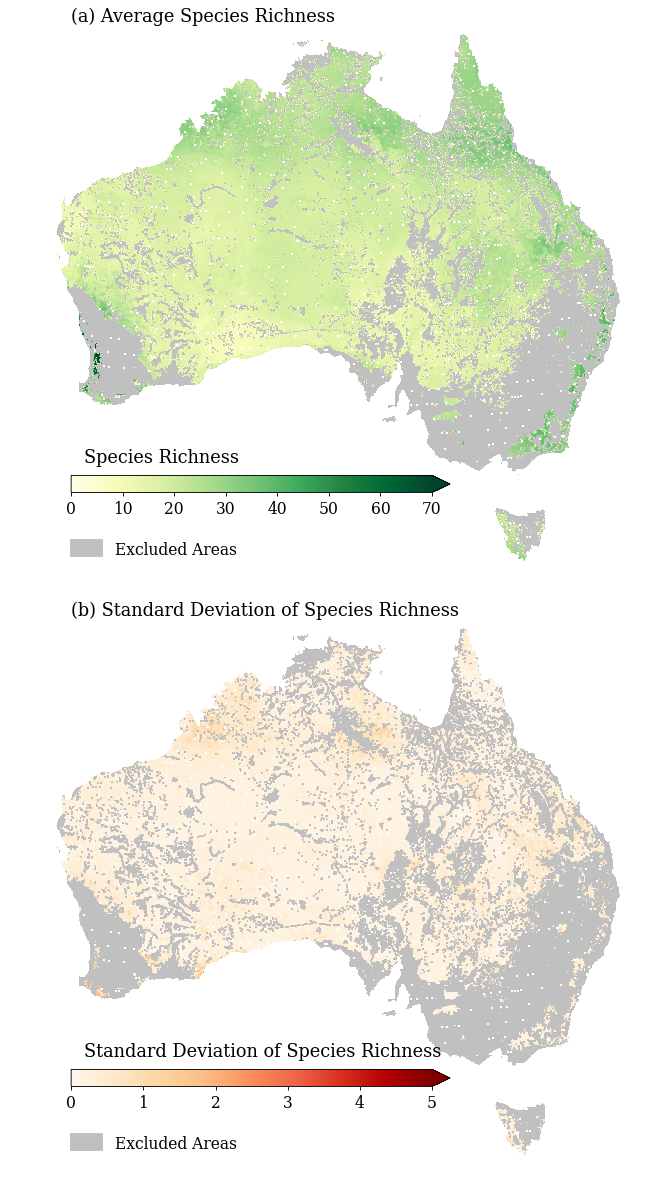

In [9]:
cmap = plt.get_cmap('YlGn')
cmap.set_under(color='silver', alpha=None)

figure(figsize=(18, 15), dpi=80)

ax = plt.subplot(2, 1, 1)
plt.imshow(mean, cmap=cmap)
plt.box(False)
plt.axis('off')
cb = plt.colorbar(cax=ax.inset_axes((0.1, 0.17, 0.60, 0.03)), orientation='horizontal', extend='max')
plt.clim(0, 70)
t = plt.text(200, 0, '(a) Average Species Richness', fontsize=16)
# t.set_bbox(dict(facecolor='grey', alpha=0.1, edgecolor='white'))
t = plt.text(208, 1680, '       ', fontsize=10)
t.set_bbox(dict(facecolor='silver', alpha=1, edgecolor='white'))
t = plt.text(340, 1690, 'Excluded Areas', fontsize=14)
plt.text(240, 1400, 'Species Richness', fontsize=16)
cb.ax.tick_params(labelsize=14)

cmap = plt.get_cmap('OrRd')
cmap.set_under(color='silver', alpha=None)

ax = plt.subplot(2, 1, 2)
plt.imshow(std, cmap=cmap)
plt.box(False)
plt.axis('off')
cb = plt.colorbar(cax=ax.inset_axes((0.1, 0.17, 0.60, 0.03)), orientation='horizontal', extend='max')
plt.clim(0, 5)
t = plt.text(200, 0, '(b) Standard Deviation of Species Richness', fontsize=16)
# t.set_bbox(dict(facecolor='grey', alpha=0.1, edgecolor='white'))
t = plt.text(208, 1680, '       ', fontsize=10)
t.set_bbox(dict(facecolor='silver', alpha=1, edgecolor='white'))
t = plt.text(340, 1690, 'Excluded Areas', fontsize=14)
plt.text(240, 1400, 'Standard Deviation of Species Richness', fontsize=16)
cb.ax.tick_params(labelsize=14)
plt.tight_layout()

plt.savefig('../figs/avg.jpg', bbox_inches='tight', dpi=600)